In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
integrated = sc.read_h5ad("data/co_integrated_data/cross_species_human_augmented+KNAF12.h5ad")

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\anndata\compat\__init__.py:363: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [31]:
integrated.obs['training_labels'].value_counts() 

training_labels
-1.0    26846
 0.0     3265
 1.0     1820
Name: count, dtype: int64

In [32]:
integrated.obs['orig.ident'].value_counts()

orig.ident
KNAF12_Humain-P11_NeuN_180325    8688
KNAF8                            4306
ZHANG                            3663
YADAV                            3555
KNAF3                            3265
KNAF11                           2598
KNAF9                            2354
KNAF4                            1820
KNAF10                           1682
Name: count, dtype: int64

In [33]:
# # Drop BOUV5 
# integrated = integrated[integrated.obs['orig.ident'] != 'BOUV5']

In [34]:
mouse_annotations = sc.read_h5ad("data/annotated_data/mouse_neurons_rpca_xgb.h5ad")

In [35]:
mouse_annotations.obs['orig.ident'].value_counts()

orig.ident
KNAF3     3265
KATHE     2331
MATSON    2305
KNAF4     1820
BOUV5     1417
Name: count, dtype: int64

In [36]:
mouse_annotations

AnnData object with n_obs × n_vars = 11138 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'citeseq', 'annotation', 'labels_xgb', 'labels_svm', 'v1'
    var: 'vf_vst_counts.BOUV5_mean', 'vf_vst_counts.BOUV5_variance', 'vf_vst_counts.BOUV5_variance.expected', 'vf_vst_counts.BOUV5_variance.standardized', 'vf_vst_counts.BOUV5_variable', 'vf_vst_counts.BOUV5_rank', 'vf_vst_counts.KATHE_mean', 'vf_vst_counts.KATHE_variance', 'vf_vst_counts.KATHE_variance.expected', 'vf_vst_counts.KATHE_variance.standardized', 'vf_vst_counts.KATHE_variable', 'vf_vst_counts.KATHE_rank', 'vf_vst_counts.MATSON_mean', 'vf_vst_counts.MATSON_variance', 'vf_vst_counts.MATSON_variance.expected', 'vf_vst_counts.MATSON_variance.standardized', 'vf_vst_counts.MATSON_variable', 'vf_vst_counts.MATSON_rank', 'vf_vst_counts.KNAF3_mean', 'vf_vst_counts.KNAF3_variance', 'vf_vst_counts.KNAF3_variance.expected', 'vf_vst_counts.KNAF3_variance.standardi

In [37]:
mouse_annotations.obs['labels_xgb'].value_counts()

labels_xgb
0    9188
1    1950
Name: count, dtype: int64

In [38]:
mouse_annotations.obs.index = [c[:-2] for c in mouse_annotations.obs.index]

In [39]:
# Add labels_xgb to the integrated dataset
integrated.obs['labels_xgb'] = -1

In [40]:
integrated.obs['labels_xgb'].value_counts()

labels_xgb
-1    31931
Name: count, dtype: int64

In [41]:
# Add labels_xgb to the integrated dataset
integrated.obs['labels_xgb'] = mouse_annotations.obs['labels_xgb']

In [42]:
integrated.obs['labels_xgb']

KNAF3_En1Sun1NeuN_AAACCTGAGATGCGAC-1                NaN
KNAF3_En1Sun1NeuN_AAACCTGCAAACGCGA-1                NaN
KNAF3_En1Sun1NeuN_AAACCTGCACTTGGAT-1                NaN
KNAF3_En1Sun1NeuN_AAACCTGCATAGACTC-1                NaN
KNAF3_En1Sun1NeuN_AAACCTGCATATGAGA-1                NaN
                                                   ... 
KNAF12_Humain-P11_NeuN_180325_TTTGTCAGTCCTCTTG-1    NaN
KNAF12_Humain-P11_NeuN_180325_TTTGTCAGTCGACTGC-1    NaN
KNAF12_Humain-P11_NeuN_180325_TTTGTCAGTTACGACT-1    NaN
KNAF12_Humain-P11_NeuN_180325_TTTGTCATCGCAAGCC-1    NaN
KNAF12_Humain-P11_NeuN_180325_TTTGTCATCGCGGATC-1    NaN
Name: labels_xgb, Length: 31931, dtype: category
Categories (2, int64): [0, 1]

In [43]:
# replace NaN with -1
# Add -1 category to the dataframe
integrated.obs['labels_xgb'] = integrated.obs['labels_xgb'].astype('float')

integrated.obs['labels_xgb'] = integrated.obs['labels_xgb'].fillna(-1)
integrated.obs['labels_xgb']

KNAF3_En1Sun1NeuN_AAACCTGAGATGCGAC-1               -1.0
KNAF3_En1Sun1NeuN_AAACCTGCAAACGCGA-1               -1.0
KNAF3_En1Sun1NeuN_AAACCTGCACTTGGAT-1               -1.0
KNAF3_En1Sun1NeuN_AAACCTGCATAGACTC-1               -1.0
KNAF3_En1Sun1NeuN_AAACCTGCATATGAGA-1               -1.0
                                                   ... 
KNAF12_Humain-P11_NeuN_180325_TTTGTCAGTCCTCTTG-1   -1.0
KNAF12_Humain-P11_NeuN_180325_TTTGTCAGTCGACTGC-1   -1.0
KNAF12_Humain-P11_NeuN_180325_TTTGTCAGTTACGACT-1   -1.0
KNAF12_Humain-P11_NeuN_180325_TTTGTCATCGCAAGCC-1   -1.0
KNAF12_Humain-P11_NeuN_180325_TTTGTCATCGCGGATC-1   -1.0
Name: labels_xgb, Length: 31931, dtype: float64

In [44]:
integrated.obs['training_labels'].value_counts()

training_labels
-1.0    26846
 0.0     3265
 1.0     1820
Name: count, dtype: int64

In [45]:
integrated.obs['labels_xgb'].value_counts()

labels_xgb
-1.0    31931
Name: count, dtype: int64

In [46]:
integrated.obs['labels_xgb'].value_counts()

labels_xgb
-1.0    31931
Name: count, dtype: int64

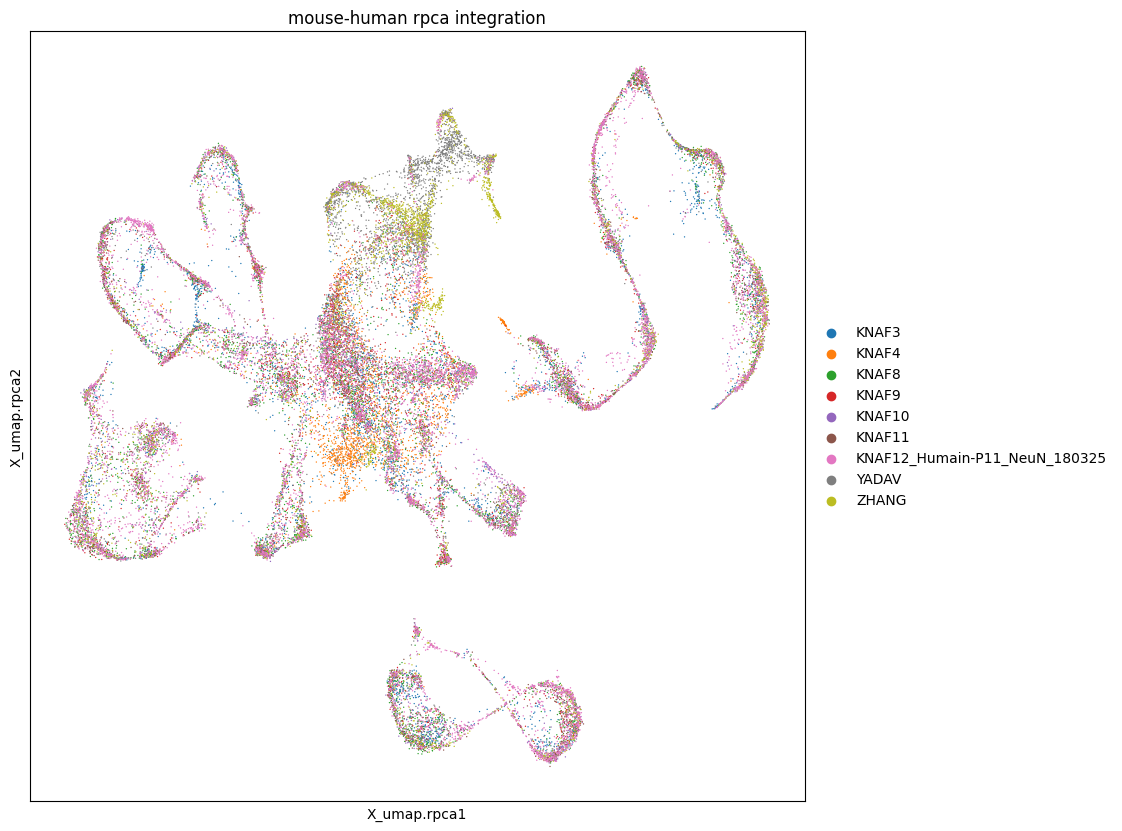

In [47]:
# Plot the UMAP of the integrated dataset
fig, ax = plt.subplots(1,1, figsize = (10,10))
sc.pl.embedding(integrated, basis='X_umap.rpca', color='orig.ident', title='mouse-human rpca integration', ax =ax)

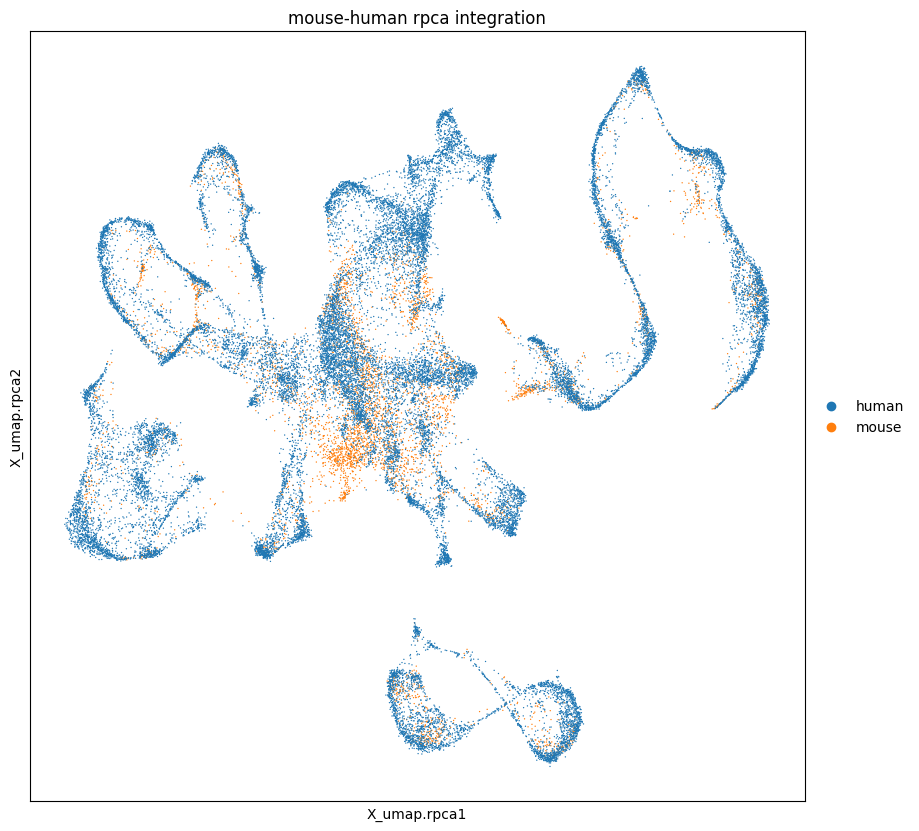

In [48]:
# Plot the UMAP of the integrated dataset
fig, ax = plt.subplots(1,1, figsize = (10,10))
sc.pl.embedding(integrated, basis='X_umap.rpca', color='species', title='mouse-human rpca integration', ax =ax)

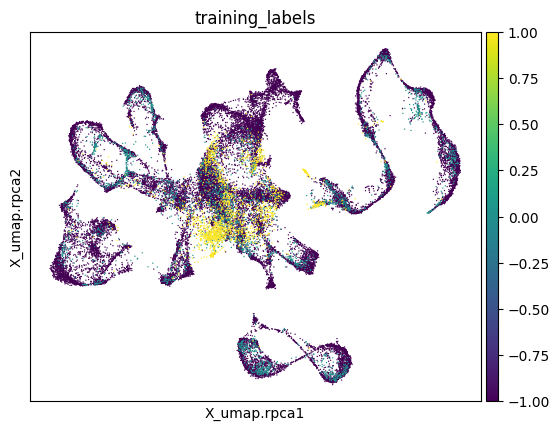

In [50]:
# Plot the UMAP of the integrated dataset
sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='training_labels')

In [51]:
integrated.obs['training_labels'].groupby(integrated.obs['orig.ident']).value_counts()

C:\Users\Emile\AppData\Local\Temp\ipykernel_20508\1844855084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  integrated.obs['training_labels'].groupby(integrated.obs['orig.ident']).value_counts()


orig.ident                     training_labels
KNAF3                           0.0               3265
                               -1.0                  0
                                1.0                  0
KNAF4                           1.0               1820
                               -1.0                  0
                                0.0                  0
KNAF8                          -1.0               4306
                                0.0                  0
                                1.0                  0
KNAF9                          -1.0               2354
                                0.0                  0
                                1.0                  0
KNAF10                         -1.0               1682
                                0.0                  0
                                1.0                  0
KNAF11                         -1.0               2598
                                0.0                  0
                  

In [52]:
integrated.obs['annotation'] = integrated.obs['training_labels'].apply(lambda x: 'V1_CITEseq+' if x == 1 else 'CITEseq-' if x == 0 else 'Unnassigned')

In [53]:
integrated.obs['annotation'] = integrated.obs['annotation'].astype('category')

In [54]:
integrated.obs['training_labels'].value_counts()

training_labels
-1.0    26846
 0.0     3265
 1.0     1820
Name: count, dtype: int64

In [55]:
integrated.uns['annotation_colors'] = ['yellow', 'blue', 'green']

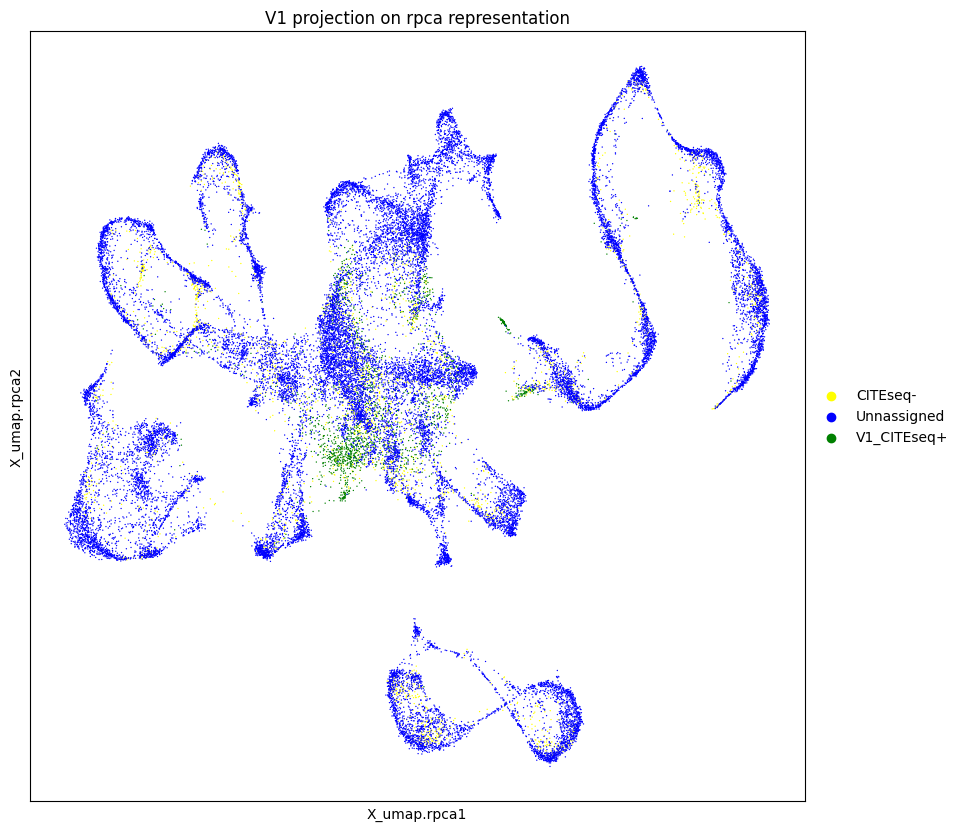

In [56]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='annotation', title = 'V1 projection on rpca representation', ax = ax)

In [29]:
# # try changing the data distribution to be more balanced
# # 1. downsample the majority class
# # 2. upsample the minority class

# # downsample the majority class
# from sklearn.utils import resample

# # Separate majority and minority classes
# integrated_majority = integrated[integrated.obs['training_labels'] == 0]
# integrated_minority = integrated[integrated.obs['training_labels'] == 1]

# # Downsample majority class
# integrated_majority_downsampled = resample(integrated_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=integrated_minority.shape[0],     # to match minority class
#                                  random_state=123) # reproducible results

# # Combine minority class with downsampled majority class
# integrated_downsampled = sc.concat([integrated_majority_downsampled, integrated_minority])

# integrated_downsampled.obs['training_labels'].value_counts()

## Ajustments

In [29]:
# Plot umap to show species
sc.pl.umap(integrated, color='species', title='Species')

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [ ]:
# Check the distance between species
sc.pp.neighbors(integrated)
sc.tl.umap(integrated)
sc.pl.umap(integrated, color='species', title='Species')

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x00000195ACB3C540>
Traceback (most recent call last):
  File "C:\Users\Emile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\llvmlite\binding\executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):

KeyboardInterrupt: 


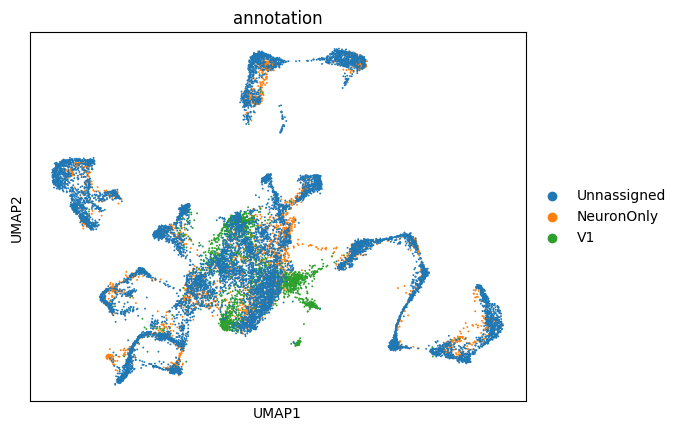

In [ ]:
# Plot umap with training labels
sc.pl.umap(integrated, color='annotation', save='integrated_umap_annotation.png')

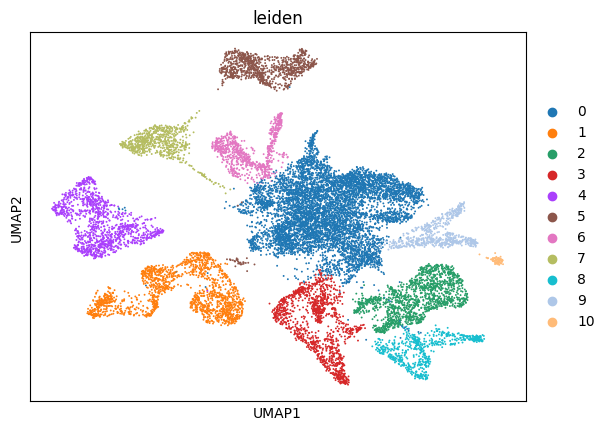

In [ ]:
# Compute clusters
sc.tl.leiden(integrated, resolution=0.1)

# Plot umap with clusters
sc.pl.umap(integrated, color='leiden')

In [ ]:
integrated.obs['leiden']

KNAF3_En1Sun1NeuN_AAACCTGAGATGCGAC-1                0
KNAF3_En1Sun1NeuN_AAACCTGCAAACGCGA-1                0
KNAF3_En1Sun1NeuN_AAACCTGCACTTGGAT-1                9
KNAF3_En1Sun1NeuN_AAACCTGCATAGACTC-1                0
KNAF3_En1Sun1NeuN_AAACCTGCATATGAGA-1                0
                                                   ..
KNAF11_Humain-P13_NeuN_221124_TTTGTCAAGCTACCTA-1    7
KNAF11_Humain-P13_NeuN_221124_TTTGTCAGTAGCCTCG-1    1
KNAF11_Humain-P13_NeuN_221124_TTTGTCATCCTGTACC-1    0
KNAF11_Humain-P13_NeuN_221124_TTTGTCATCGGGAGTA-1    5
KNAF11_Humain-P13_NeuN_221124_TTTGTCATCTTGTCAT-1    0
Name: leiden, Length: 16025, dtype: category
Categories (11, object): ['0', '1', '2', '3', ..., '7', '8', '9', '10']

In [ ]:
# Consider only clusters with V1 mouse cells in them

# Get the cluster with V1 mouse cells
nb_V1_in_cluster = integrated.obs[integrated.obs['training_labels'] != -1].groupby('leiden').size()

C:\Users\Emile\AppData\Local\Temp\ipykernel_6248\3754515066.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nb_V1_in_cluster = integrated.obs[integrated.obs['training_labels'] != -1].groupby('leiden').size()


In [ ]:
nb_V1_in_cluster

leiden
0     3205
1      309
2      192
3      294
4      255
5      269
6      118
7      149
8      150
9       76
10      68
dtype: int64

In [ ]:
integrated_zoom = integrated[integrated.obs['leiden'].isin(nb_V1_in_cluster[nb_V1_in_cluster > 200].index)]

In [ ]:
integrated_zoom

View of AnnData object with n_obs × n_vars = 11771 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'integrated_snn_res.0.5', 'seurat_clusters', 'training_labels', 'predicted_labels_xgb', 'predicted_labels_svm', 'predicted_labels_knn', 'leiden'
    var: 'features'
    uns: 'neighbors', 'species_colors', 'umap', 'training_labels_colors', 'predicted_labels_xgb_colors', 'predicted_labels_svm_colors', 'predicted_labels_knn_colors', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## Training using predicted mouse annotation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

In [31]:
integrated.obs['orig.ident'].groupby(integrated.obs['species']).value_counts()

C:\Users\Emile\AppData\Local\Temp\ipykernel_16428\2359467213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  integrated.obs['orig.ident'].groupby(integrated.obs['species']).value_counts()


species  orig.ident
human    KNAF8         4306
         ZHANG         3663
         YADAV         3555
         KNAF11        2598
         KNAF9         2354
         KNAF10        1682
         BOUV5            0
         KATHE            0
         KNAF3            0
         KNAF4            0
         MATSON           0
         TREVISAN         0
mouse    TREVISAN      6964
         KNAF3         3265
         KATHE         2331
         MATSON        2305
         KNAF4         1820
         BOUV5         1417
         KNAF8            0
         KNAF9            0
         KNAF10           0
         KNAF11           0
         YADAV            0
         ZHANG            0
Name: count, dtype: int64

In [32]:
# Split data

train_data = integrated[integrated.obs['training_labels'] != -1]

X = train_data.obsm['X_rpca']
y = train_data.obs['training_labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [33]:
# Plot sizes 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7776, 50)
(1945, 50)
(7776,)
(1945,)


In [34]:
# Look at the distribution of the training labels
y_train.value_counts()

training_labels
0.0    6069
1.0    1707
Name: count, dtype: int64

In [35]:
# Train an xgb classifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 94.34%
F1: 86.49%


In [ ]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\Emile\AppData\Local\Programs\Python\P

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [36]:
xgb = grid_search.best_estimator_

y_pred_xgb = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

NameError: name 'grid_search' is not defined

In [37]:
# Train an svm 

from sklearn.svm import SVC

svm = SVC(kernel = 'rbf')

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 94.45%
F1: 86.73%


In [38]:
# Train a knn classifier on PCA data

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 90.44%
F1: 80.30%


In [39]:
# Look number of predicted labels
print(pd.Series(y_pred_xgb).value_counts())
print(pd.Series(y_pred_svm).value_counts())
print(pd.Series(y_pred_knn).value_counts())


0    1559
1     386
Name: count, dtype: int64
0.0    1559
1.0     386
Name: count, dtype: int64
0.0    1429
1.0     516
Name: count, dtype: int64


In [40]:
# Predict on all data
X_all = integrated.obsm['X_rpca']

y_pred_all_xgb = xgb.predict(X_all)
y_pred_all_svm = svm.predict(X_all)
y_pred_all_knn = knn.predict(X_all)


# Add predictions to the integrated object
integrated.obs['predicted_labels_xgb'] = y_pred_all_xgb
integrated.obs['predicted_labels_svm'] = y_pred_all_svm
integrated.obs['predicted_labels_knn'] = y_pred_all_knn


In [41]:
# Look at the distribution of the predicted labels
print(pd.Series(y_pred_all_xgb).value_counts())
print(pd.Series(y_pred_all_svm).value_counts())
print(pd.Series(y_pred_all_knn).value_counts())

0    27447
1     8813
Name: count, dtype: int64
0.0    27186
1.0     9074
Name: count, dtype: int64
0.0    23051
1.0    13209
Name: count, dtype: int64


In [42]:
# Labels as categories
integrated.obs['predicted_labels_xgb'] = integrated.obs['predicted_labels_xgb'].astype('category')
integrated.obs['predicted_labels_svm'] = integrated.obs['predicted_labels_svm'].astype('category')
integrated.obs['predicted_labels_knn'] = integrated.obs['predicted_labels_knn'].astype('category')


In [63]:
integrated.obs['predicted_annotation'] = integrated.obs['predicted_labels_xgb'].apply(lambda x: 'V1' if x == 1 else 'NeuronOnly' if x == 0 else 'Unnassigned')

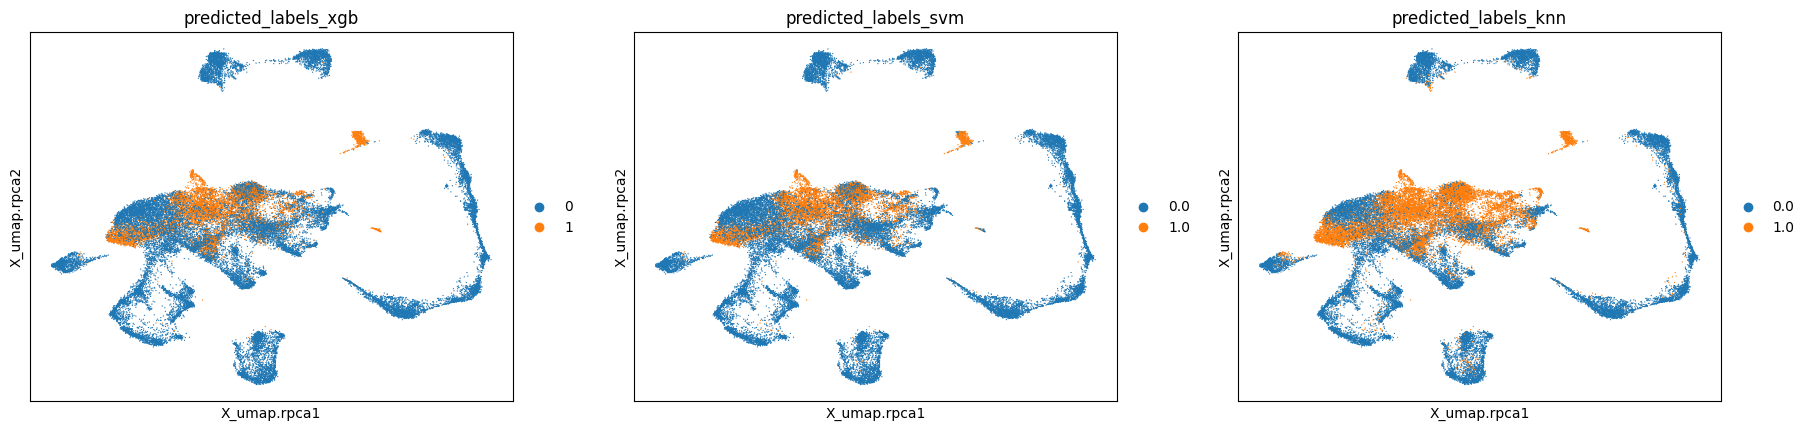

In [64]:
## Plotting

sc.pl.embedding(integrated, basis = 'X_umap.rpca', color=['predicted_labels_xgb', 'predicted_labels_svm', 'predicted_labels_knn'])

In [110]:
integrated.uns['predicted_annotation_colors'] = ['yellow', 'green']

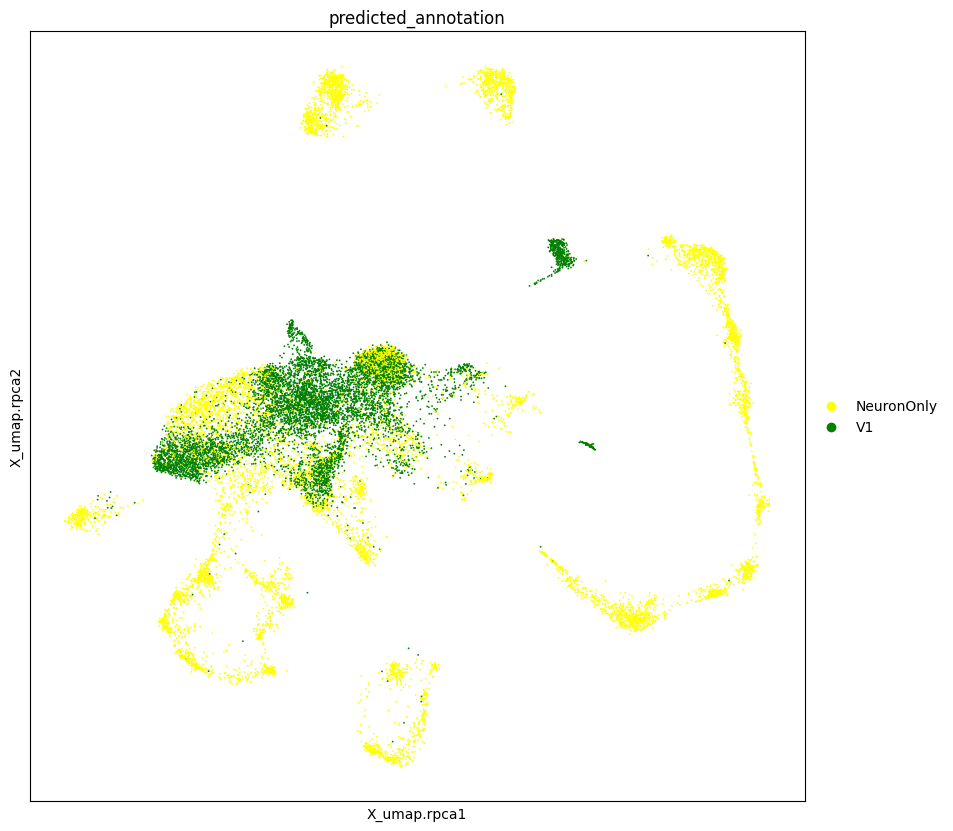

In [119]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated[integrated.obs['species'] == 'mouse'], basis = 'X_umap.rpca', color='predicted_annotation', ax = ax)

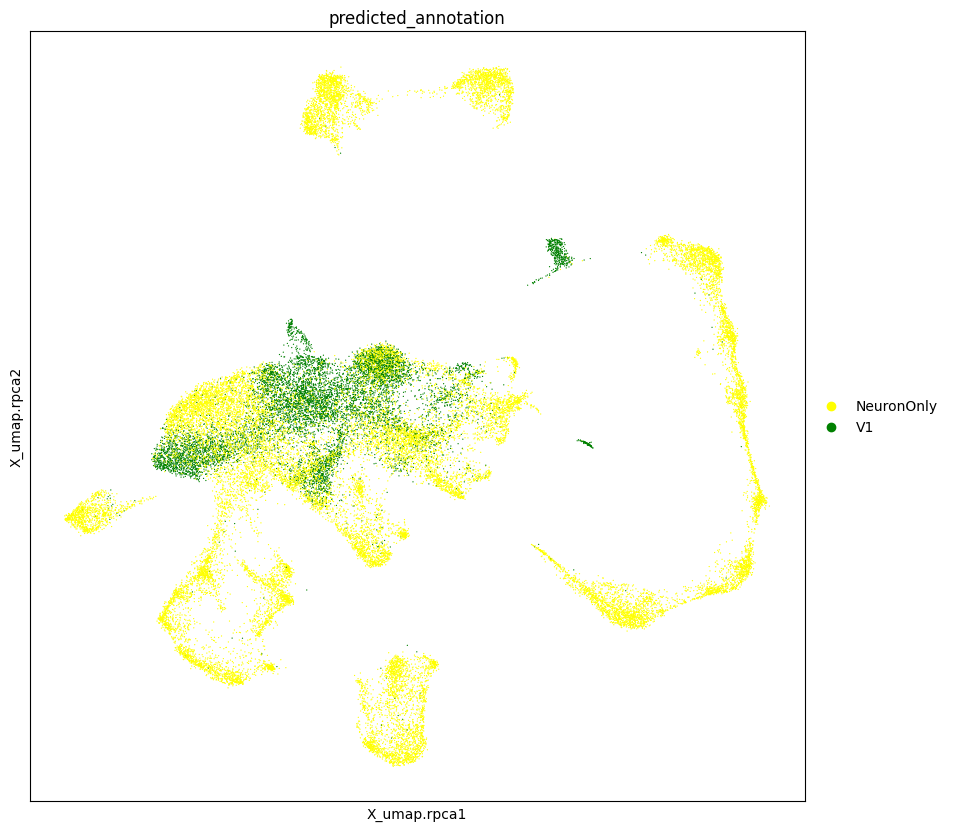

In [111]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='predicted_annotation', ax = ax)


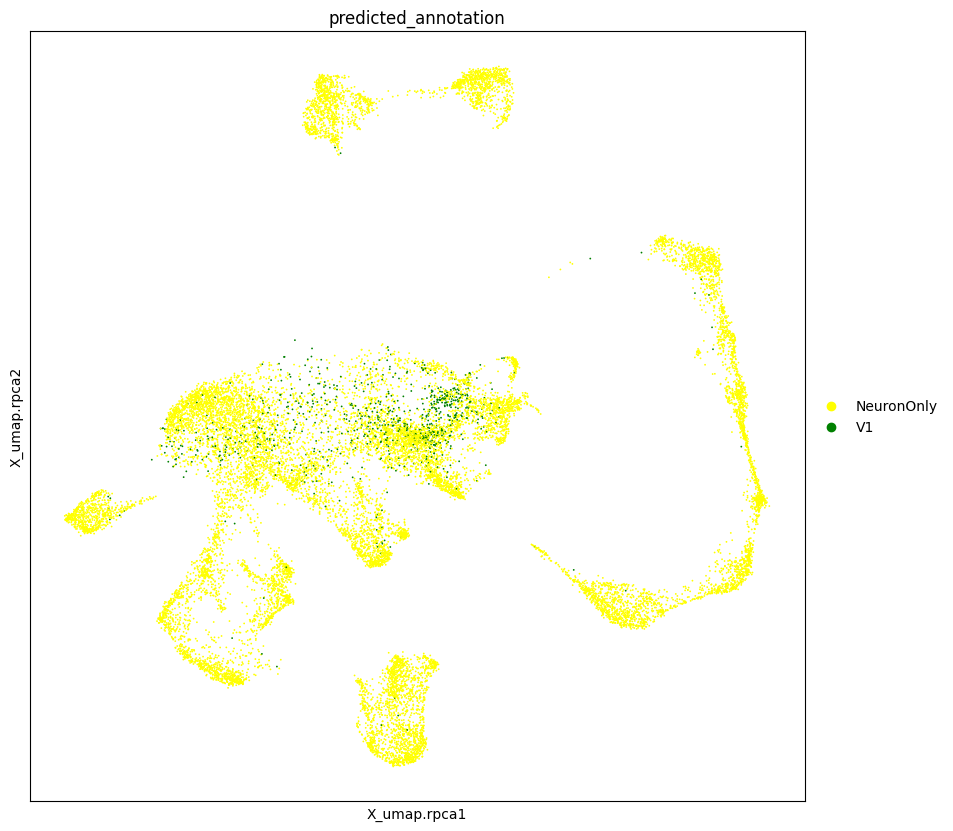

In [112]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color='predicted_annotation', ax = ax)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color='orig.ident', ax = ax)

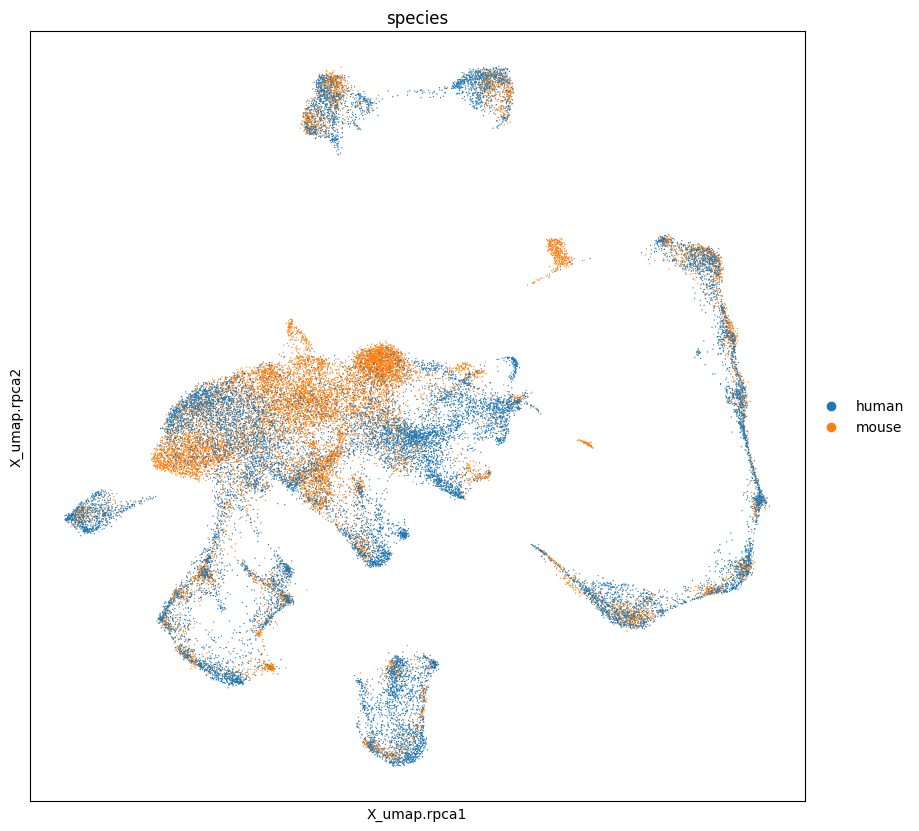

In [116]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='species', ax = ax)

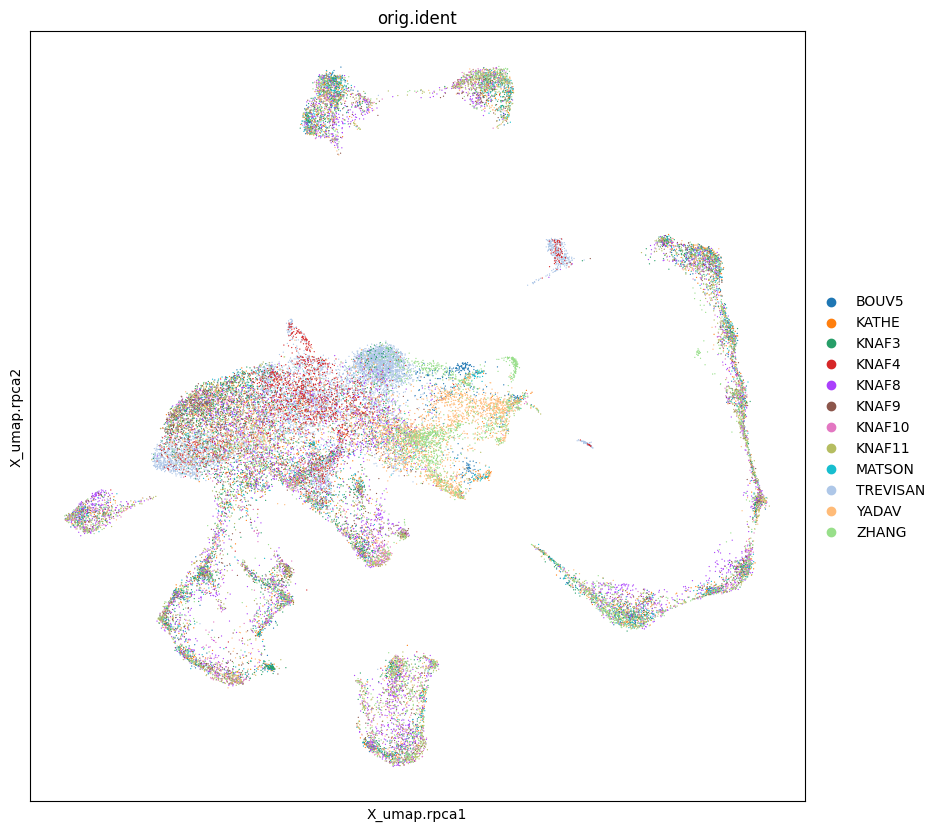

In [115]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='orig.ident', ax = ax)

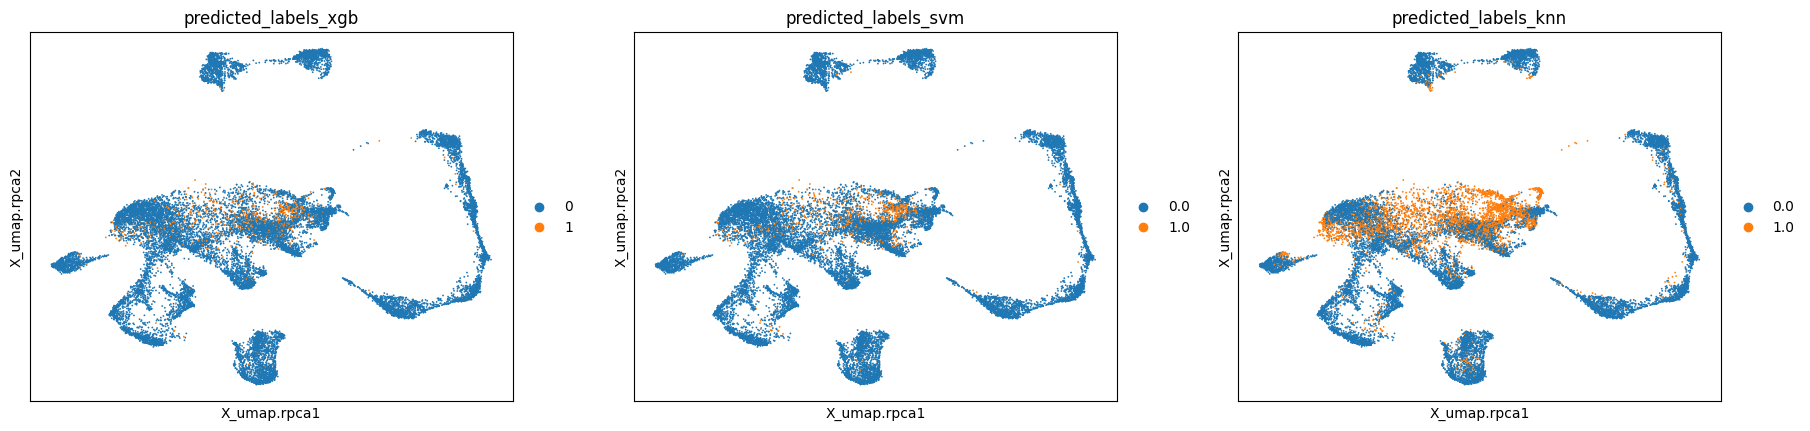

In [44]:
# Plot only human neurons
sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color=['predicted_labels_xgb', 'predicted_labels_svm', 'predicted_labels_knn'])

In [124]:
sc.pp.neighbors(integrated, use_rep='X_rpca')


In [125]:
sc.tl.leiden(integrated)

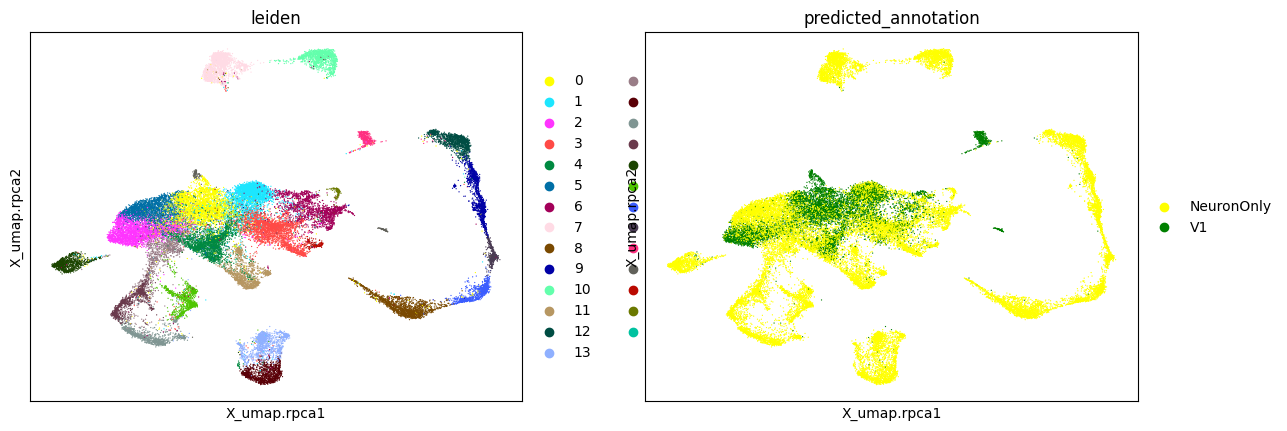

In [129]:
sc.pl.embedding(integrated, basis = 'X_umap.rpca', color=['leiden', 'predicted_annotation'])

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\plotting\_utils.py:491: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


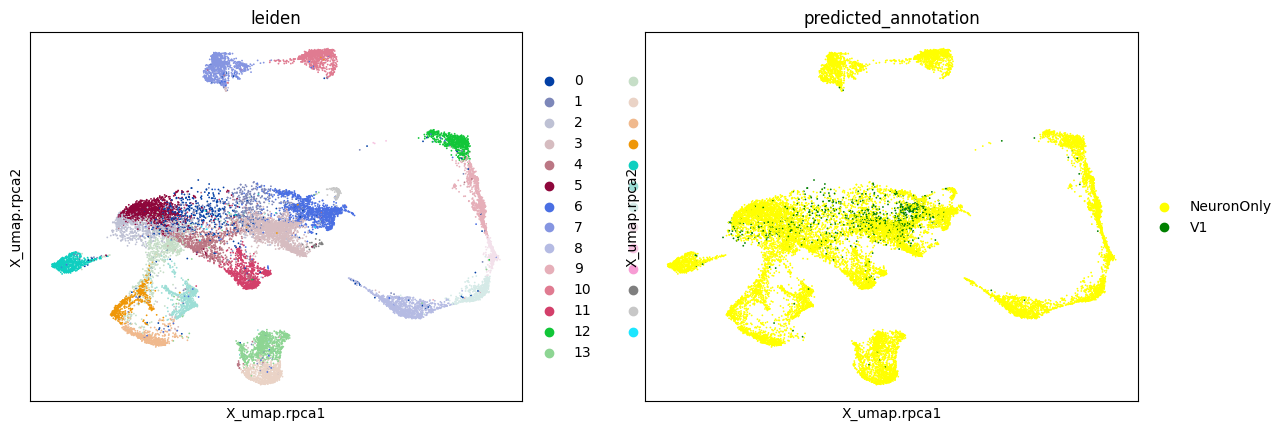

In [130]:
sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color=['leiden', 'predicted_annotation'])

## Training using only knaf3-4 for ref

In [57]:
integrated.obs['training_labels'] = integrated.obs['orig.ident'].apply(lambda x: 1 if x == 'KNAF4' else 0 if x == 'KNAF3' else -1)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

In [59]:
integrated.obs['orig.ident'].groupby(integrated.obs['species']).value_counts()

C:\Users\Emile\AppData\Local\Temp\ipykernel_20508\2359467213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  integrated.obs['orig.ident'].groupby(integrated.obs['species']).value_counts()


species  orig.ident                   
human    KNAF12_Humain-P11_NeuN_180325    8688
         KNAF8                            4306
         ZHANG                            3663
         YADAV                            3555
         KNAF11                           2598
         KNAF9                            2354
         KNAF10                           1682
         KNAF3                               0
         KNAF4                               0
mouse    KNAF3                            3265
         KNAF4                            1820
         KNAF8                               0
         KNAF9                               0
         KNAF10                              0
         KNAF11                              0
         KNAF12_Humain-P11_NeuN_180325       0
         YADAV                               0
         ZHANG                               0
Name: count, dtype: int64

## Training

In [60]:
# Split data

train_data = integrated[integrated.obs['training_labels'] != -1]

X = train_data.X
y = train_data.obs['training_labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, shuffle=True)

In [61]:
# Plot sizes 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4576, 2000)
(509, 2000)
(4576,)
(509,)


In [62]:
# Look at the distribution of the training labels
y_train.value_counts()

training_labels
0    2932
1    1644
Name: count, dtype: int64

In [63]:
# Train an xgb classifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 97.45%
F1: 96.38%


In [64]:
# k-fold Cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X, y, cv=5)
scores

array([0.97148476, 0.97443461, 0.96755162, 0.96755162, 0.97443461])

In [66]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [67]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
xgb_best = grid_search.best_estimator_

scores = cross_val_score(xgb_best, X, y, cv=5)
scores

array([0.96361849, 0.96361849, 0.96165192, 0.96558505, 0.97148476])

In [ ]:
def plot_best_features(model, train_data, n = 20):
    """Plots the most important features for classification"""
    best_features_indexes = np.argsort(model.feature_importances_)[-n:]
    best_features = train_data.var_names[best_features_indexes]
    fig, ax = plt.subplots(1,1, figsize = (20,9))
    plt.bar(best_features,model.feature_importances_[best_features_indexes])
    plt.show()

Fold 0:
  Train: index=[   0    1    2 ... 5080 5082 5083]
  Test:  index=[  12   18   19 ... 5068 5081 5084]
####### Training finished #######
True Negative:  619
False Positive:  26
False Negative:  9
True Positive:  363
Accuracy:  0.9655850540806293
F1_score:  0.9540078843626807
Looking at best features.......


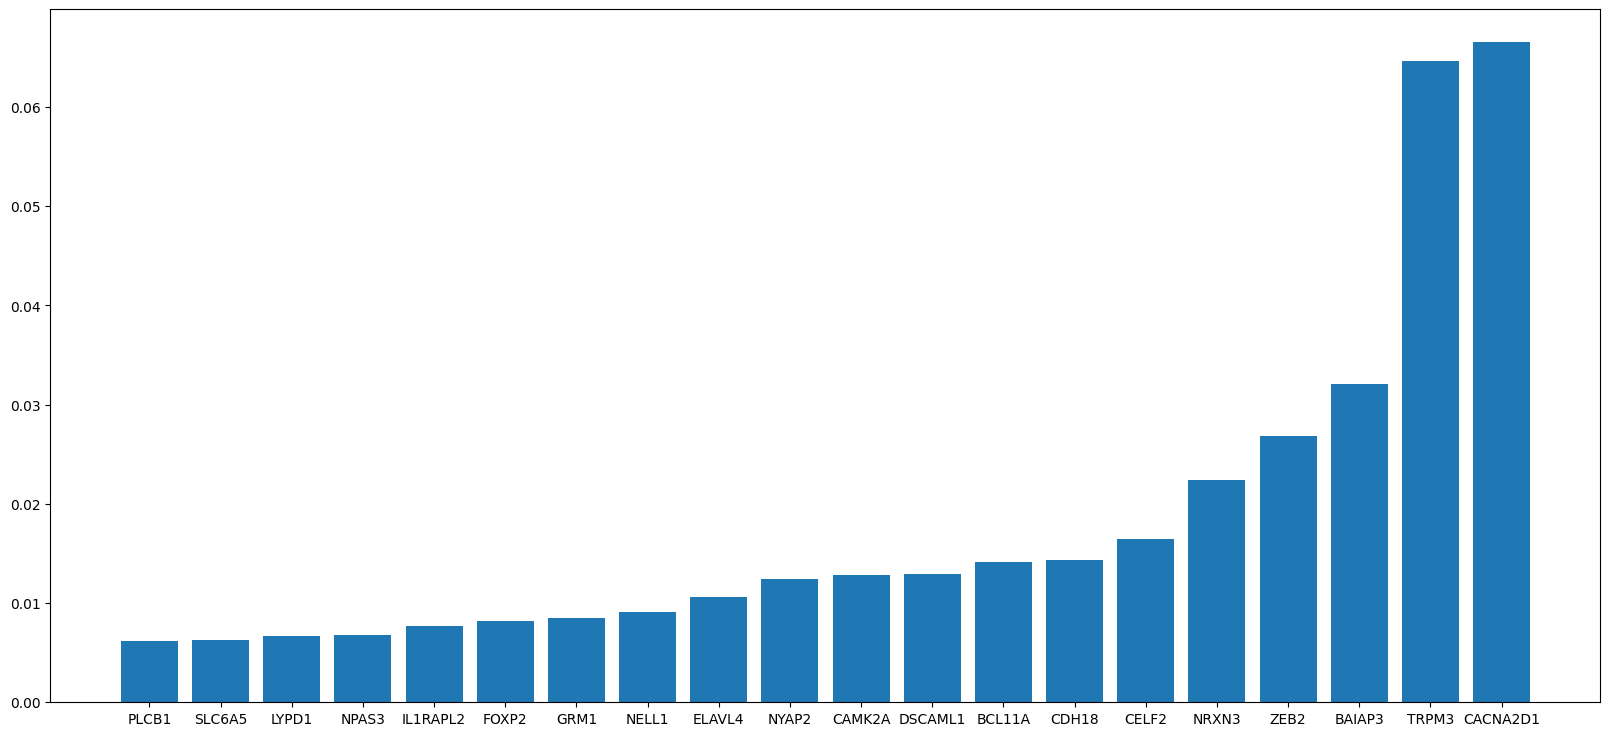

Fold 1:
  Train: index=[   1    2    3 ... 5081 5083 5084]
  Test:  index=[   0    7   24 ... 5070 5075 5082]
####### Training finished #######
True Negative:  636
False Positive:  27
False Negative:  9
True Positive:  345
Accuracy:  0.9646017699115044
F1_score:  0.9504132231404959
Looking at best features.......


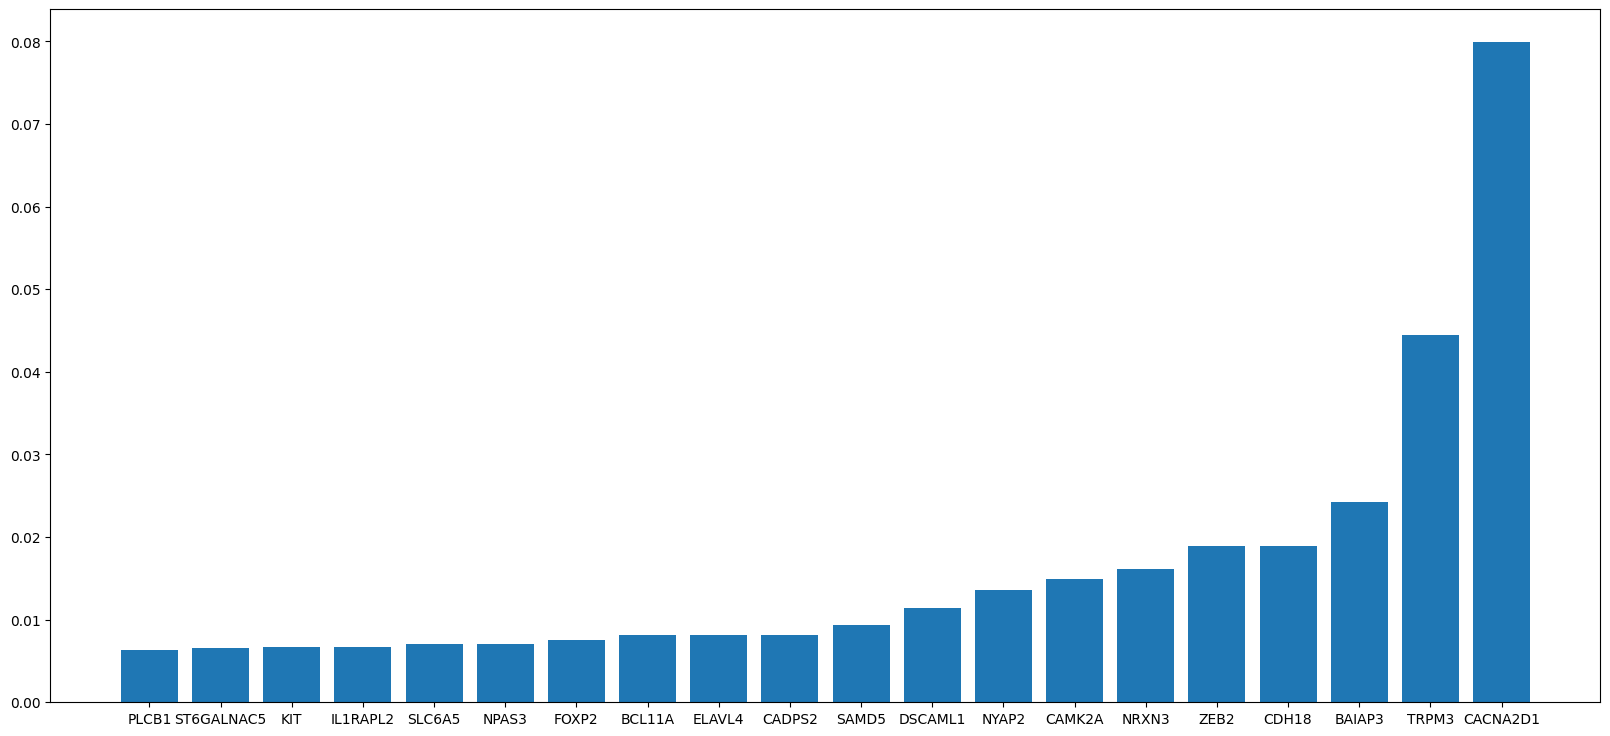

Fold 2:
  Train: index=[   0    1    2 ... 5081 5082 5084]
  Test:  index=[   4   17   21 ... 5071 5079 5083]
####### Training finished #######
True Negative:  622
False Positive:  29
False Negative:  10
True Positive:  356
Accuracy:  0.9616519174041298
F1_score:  0.948069241011984
Looking at best features.......


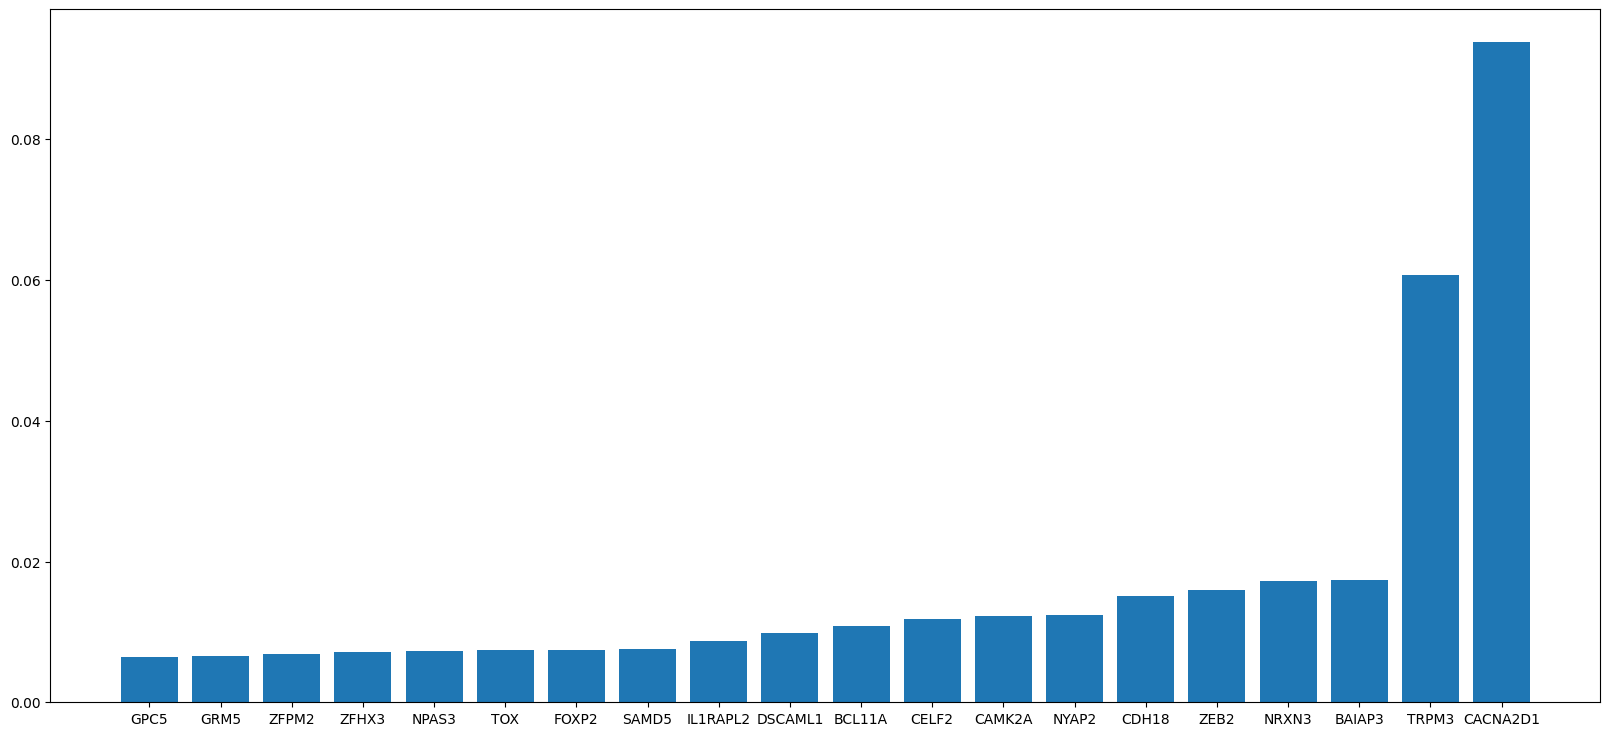

Fold 3:
  Train: index=[   0    2    4 ... 5082 5083 5084]
  Test:  index=[   1    3    5 ... 5076 5078 5080]
####### Training finished #######
True Negative:  618
False Positive:  23
False Negative:  14
True Positive:  362
Accuracy:  0.9636184857423795
F1_score:  0.9513797634691196
Looking at best features.......


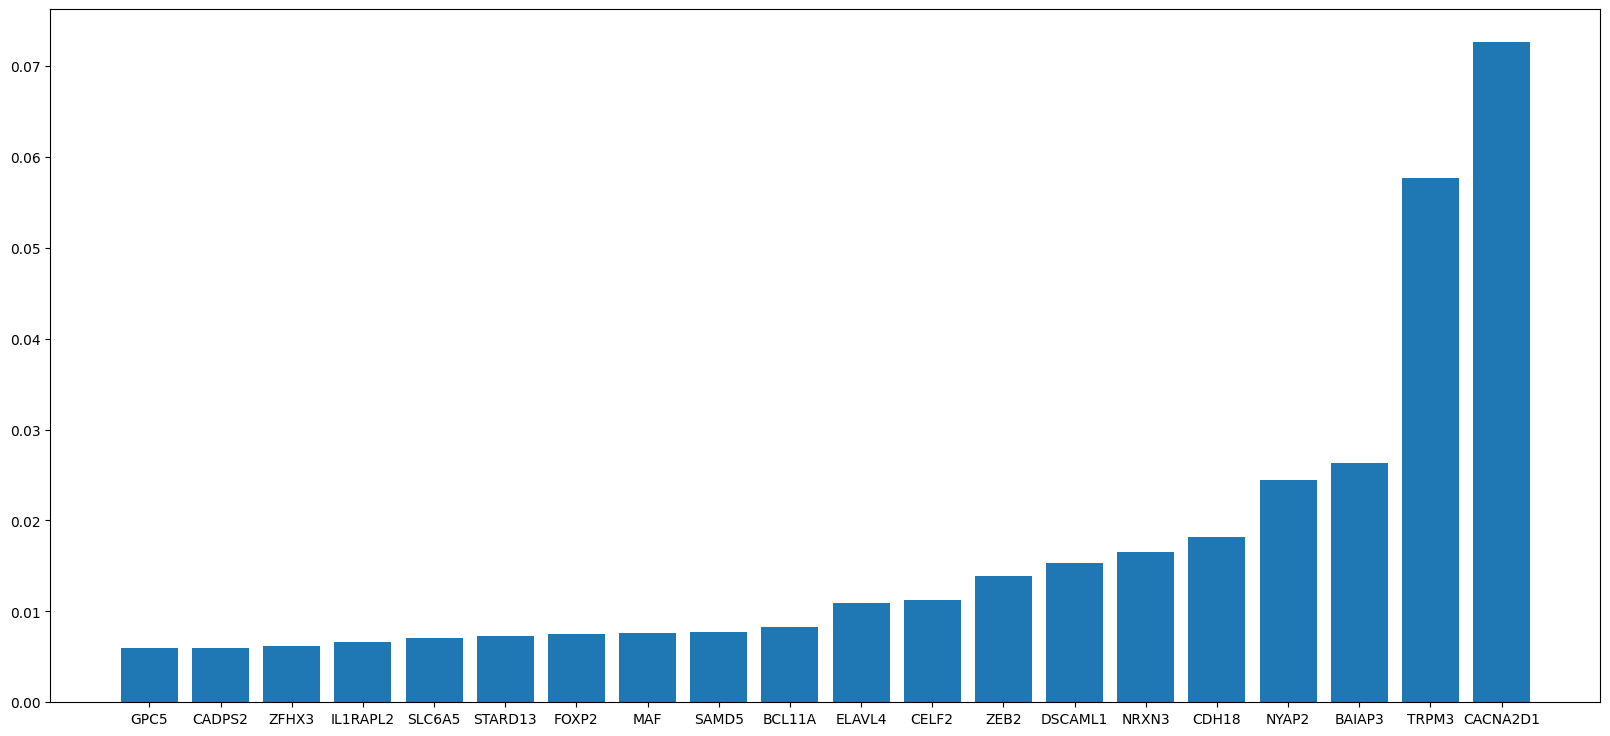

Fold 4:
  Train: index=[   0    1    3 ... 5082 5083 5084]
  Test:  index=[   2    6    8 ... 5073 5074 5077]
####### Training finished #######
True Negative:  645
False Positive:  20
False Negative:  7
True Positive:  345
Accuracy:  0.9734513274336283
F1_score:  0.9623430962343096
Looking at best features.......


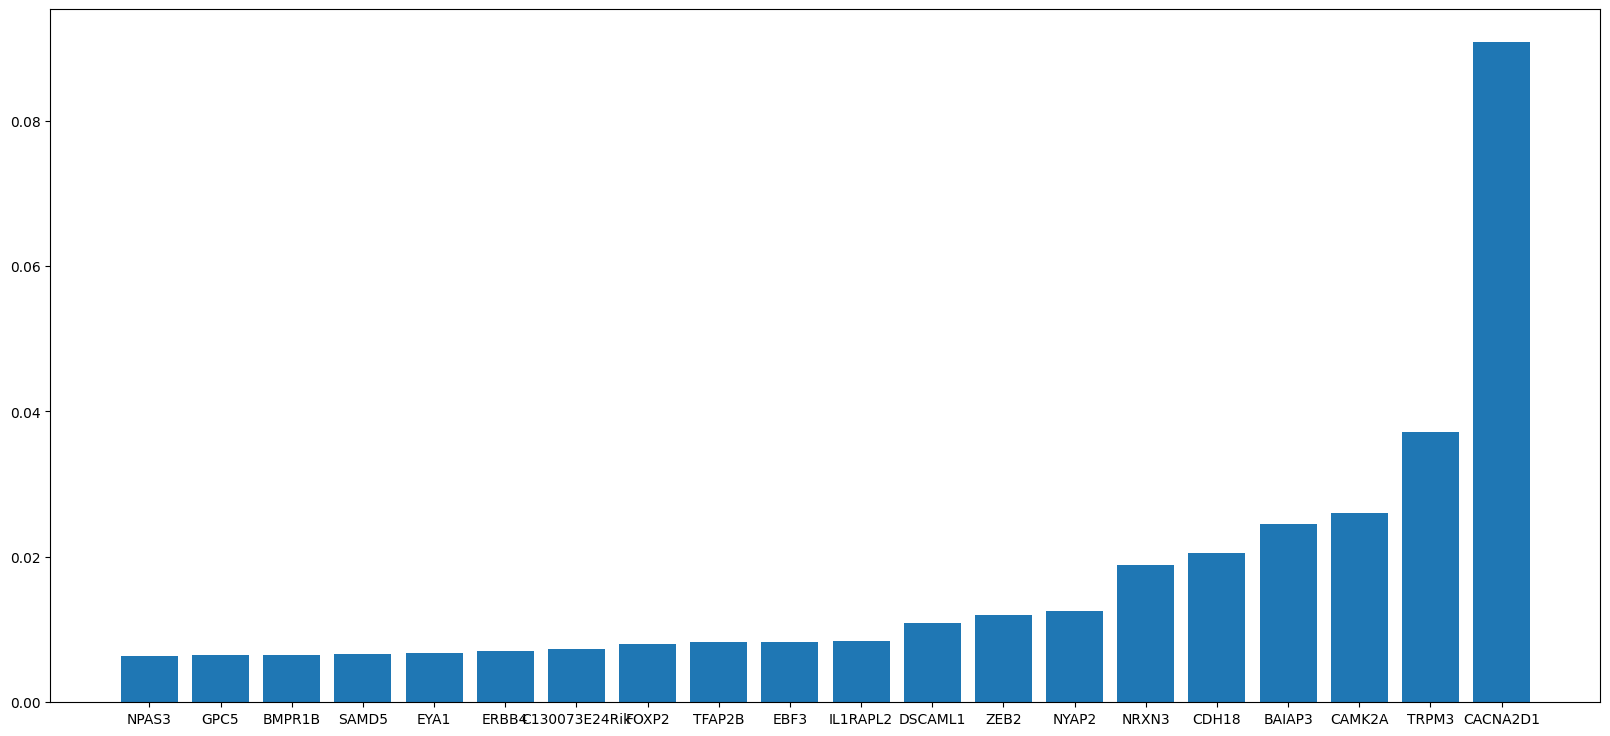

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

kf = KFold(shuffle = True)
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    xgb = XGBClassifier(learning_rate = 0.05, max_depth = 5, n_estimators = 200, random_state = 1)
    xgb.fit(X[train_index], y.iloc[train_index])
    print("####### Training finished #######")
    y_pred_test = xgb.predict(X[test_index])
    tn, fp, fn, tp = confusion_matrix(y.iloc[test_index], y_pred_test).ravel()
    print('True Negative: ', tn)
    print('False Positive: ', fp)
    print('False Negative: ', fn)
    print('True Positive: ', tp)
    print('Accuracy: ', accuracy_score(y.iloc[test_index], y_pred_test))
    print('F1_score: ', f1_score(y.iloc[test_index], y_pred_test))
    print("Looking at best features.......")
    plot_best_features(xgb, train_data)

In [69]:
y_pred_xgb = xgb_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 97.05%
F1: 95.82%


In [ ]:
# Train an svm 

from sklearn.svm import SVC

svm = SVC(kernel = 'rbf')

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 97.45%
F1: 96.42%


In [ ]:
scores = cross_val_score(svm, X, y, cv=5)
scores

array([0.97050147, 0.96558505, 0.96656834, 0.96853491, 0.98033432])

In [ ]:
# Train a knn classifier on PCA data

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 88.02%
F1: 83.91%


In [ ]:
# Look number of predicted labels
print(pd.Series(y_pred_xgb).value_counts())
print(pd.Series(y_pred_svm).value_counts())
print(pd.Series(y_pred_knn).value_counts())


0    324
1    185
Name: count, dtype: int64
0    322
1    187
Name: count, dtype: int64
0    306
1    203
Name: count, dtype: int64


In [70]:
xgb_best.save_model("models/xgb_cross_species_annotation.json")

## Prediction

In [72]:
# Predict on all data
X_all = integrated.X

y_pred_all_xgb = xgb_best.predict(X_all)
# y_pred_all_svm = svm.predict(X_all)
# y_pred_all_knn = knn.predict(X_all)


# Add predictions to the integrated object
integrated.obs['predicted_labels_xgb'] = y_pred_all_xgb
# integrated.obs['predicted_labels_svm'] = y_pred_all_svm
# integrated.obs['predicted_labels_knn'] = y_pred_all_knn


In [73]:
# Look at the distribution of the predicted labels
print(pd.Series(y_pred_all_xgb).value_counts())
# print(pd.Series(y_pred_all_svm).value_counts())
# print(pd.Series(y_pred_all_knn).value_counts())

0    29685
1     2246
Name: count, dtype: int64


In [76]:
# Labels as categories
integrated.obs['predicted_labels_xgb'] = integrated.obs['predicted_labels_xgb'].astype('category')
# integrated.obs['predicted_labels_svm'] = integrated.obs['predicted_labels_svm'].astype('category')
# integrated.obs['predicted_labels_knn'] = integrated.obs['predicted_labels_knn'].astype('category')


c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\plotting\_utils.py:491: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


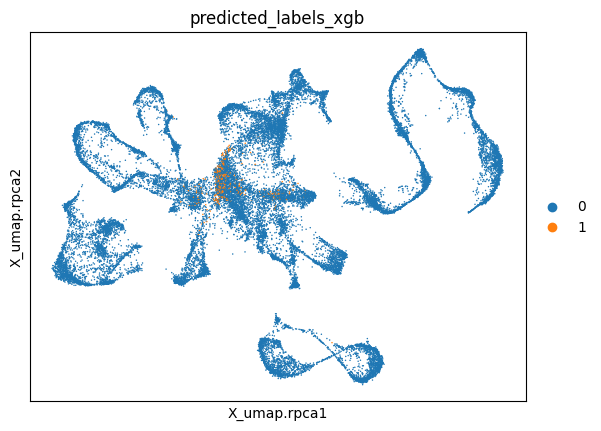

In [77]:
# Plot only human neurons
sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color=['predicted_labels_xgb'])

In [78]:
integrated.obs['predicted_annotation'] = integrated.obs['predicted_labels_xgb'].apply(lambda x: 'V1_predicted' if x == 1 else 'Not_V1_predicted')

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\plotting\_utils.py:491: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


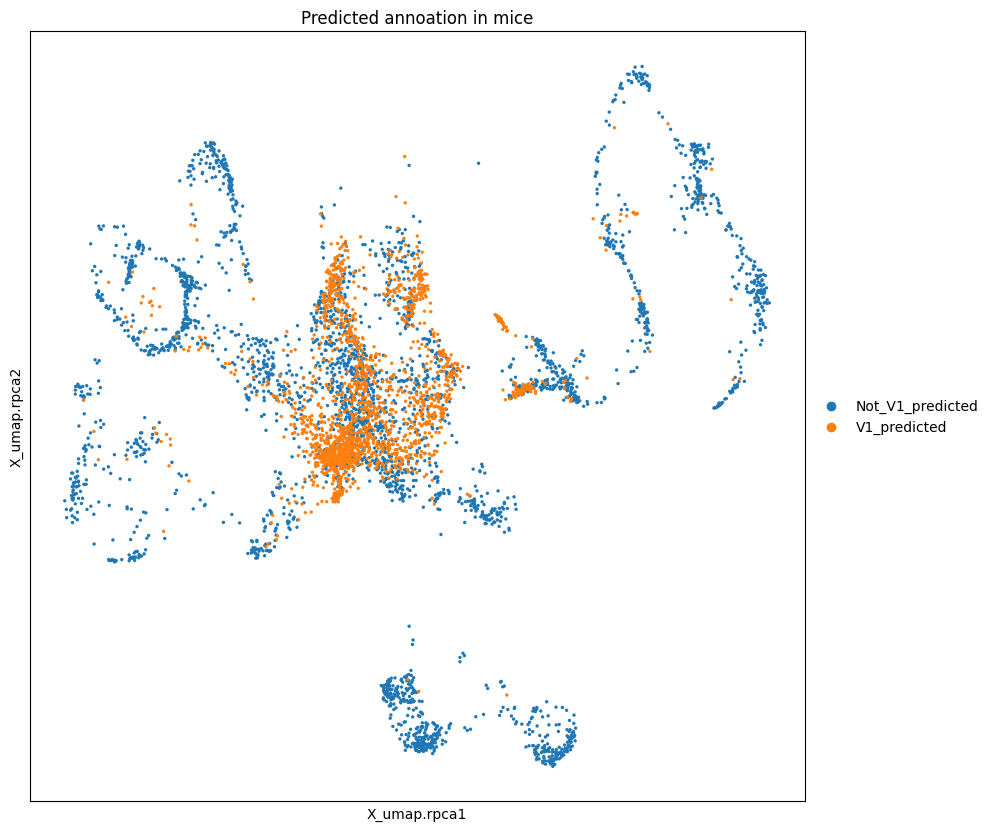

In [79]:
## Plotting
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated[integrated.obs['species'] == 'mouse'], basis = 'X_umap.rpca', color='predicted_annotation', title = 'Predicted annoation in mice', ax = ax)

In [80]:
integrated.uns['predicted_annotation_colors'] = ['yellow', 'blue']

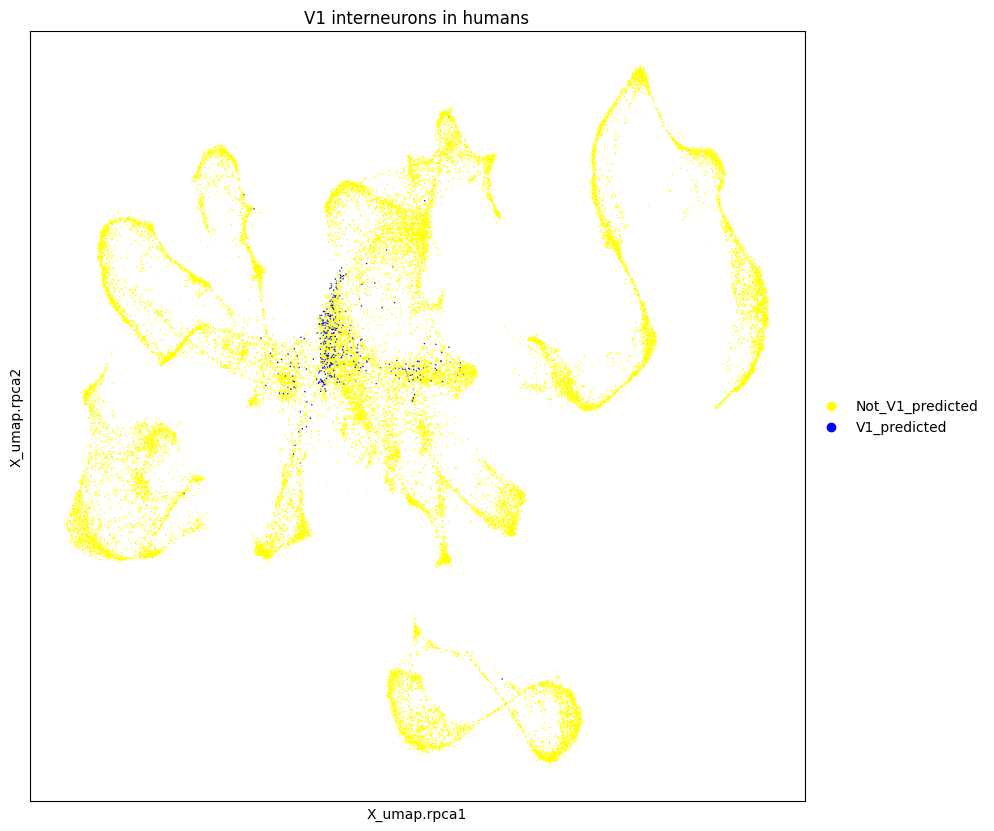

In [81]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color='predicted_annotation', title = 'V1 interneurons in humans', ax = ax)

In [89]:
# # Save annotated anndata
integrated.write('data/annotated_data/human_neurons_annotated_human_augmented+KNAF12.h5ad')

In [4]:
integrated = sc.read_h5ad('data/annotated_data/human_neurons_annotated_human_augmented.h5ad')

### SCCAF

In [ ]:
import SCCAF

In [ ]:
y_prob2, y_pred2, y_test2, clf2, cvsm2, acc2 = SCCAF.SCCAF_assessment(X, y, classifier = 'SVM', fraction = 0.8, n = 6000)

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\SCCAF\__init__.py:251: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return X[c_idx, :], X[d_idx, :], y[c_idx], y[d_idx]


Mean CV accuracy: 0.9459
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9511


In [ ]:
y_pred_sccaf = clf2.predict(X_all)

In [ ]:
pd.DataFrame(y_pred_sccaf).value_counts()

0
0    16192
1     1965
Name: count, dtype: int64

In [ ]:
integrated.obs['predicted_lables_sccaf'] = y_pred_sccaf
integrated.obs['predicted_lables_sccaf'] = integrated.obs['predicted_lables_sccaf'].astype('category')

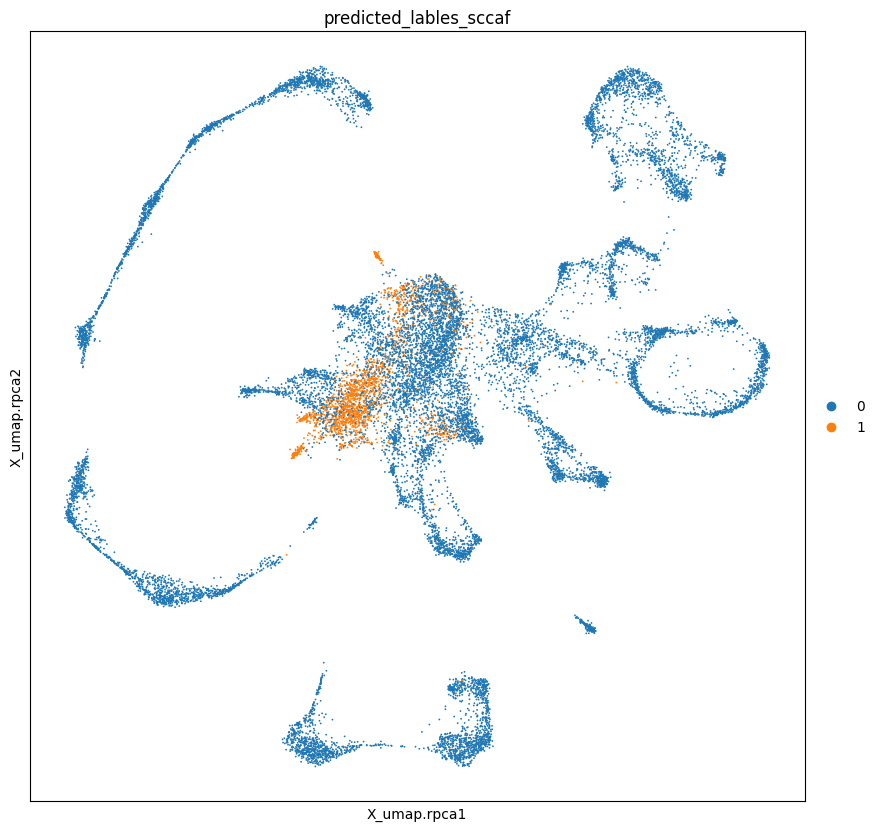

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='predicted_lables_sccaf', ax = ax)

In [ ]:
accuracy_score(y_pred_all_svm, y_pred_sccaf)

0.9882689871674836

## Exploring results

In [82]:
counts_xgb = integrated.obs.groupby(['orig.ident', 'predicted_labels_xgb']).size().unstack(fill_value=0)
counts_xgb

C:\Users\Emile\AppData\Local\Temp\ipykernel_20508\2086900617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_xgb = integrated.obs.groupby(['orig.ident', 'predicted_labels_xgb']).size().unstack(fill_value=0)


predicted_labels_xgb              0     1
orig.ident                               
KNAF3                          3248    17
KNAF4                             9  1811
KNAF8                          4272    34
KNAF9                          2330    24
KNAF10                         1655    27
KNAF11                         2539    59
KNAF12_Humain-P11_NeuN_180325  8438   250
YADAV                          3541    14
ZHANG                          3653    10

In [6]:
# counts_sccaf = integrated.obs.groupby(['orig.ident', 'predicted_lables_sccaf']).size().unstack(fill_value=0)
# counts_sccaf

In [85]:
# Count labels per orig.ident in one dataframe
def compute_props(counts):
    counts['species'] = ['mouse', 'mouse', 'human', 'human', 'human', 'human', 'human', 'human', 'human']
    counts = counts.rename(columns={0: 'NeuronOnly', 1: 'V1', -1: 'Unassigned'})
    counts = counts.rename_axis(None, axis=1).reset_index()
    counts['proportion'] = counts['V1'] / (counts['V1'] + counts['NeuronOnly'])
    # Reorder columns
    counts = counts[['orig.ident', 'species', 'NeuronOnly', 'V1', 'proportion']]
    # Drop index
    counts = counts.reset_index(drop=True)
    return counts

In [86]:
counts_xgb = compute_props(counts_xgb)
counts_xgb.sort_values(by = 'species')

orig.ident species  NeuronOnly    V1  proportion
2                          KNAF8   human        4272    34    0.007896
3                          KNAF9   human        2330    24    0.010195
4                         KNAF10   human        1655    27    0.016052
5                         KNAF11   human        2539    59    0.022710
6  KNAF12_Humain-P11_NeuN_180325   human        8438   250    0.028775
7                          YADAV   human        3541    14    0.003938
8                          ZHANG   human        3653    10    0.002730
0                          KNAF3   mouse        3248    17    0.005207
1                          KNAF4   mouse           9  1811    0.995055

In [1]:
3652+3535+2540+1656+2330+4266+40+24+26+58+20+11

18158

In [87]:
counts_xgb[counts_xgb['species'] == 'human']['V1'].sum()

np.int64(418)

In [88]:
counts_xgb[counts_xgb['species'] == 'human']['NeuronOnly'].sum()

np.int64(26428)

In [57]:
counts_svm = integrated.obs.groupby(['orig.ident', 'predicted_labels_svm']).size().unstack(fill_value=0)
counts_svm = compute_props(counts_svm)
counts_svm.sort_values(by = 'species')

C:\Users\Emile\AppData\Local\Temp\ipykernel_8776\3790939744.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_svm = integrated.obs.groupby(['orig.ident', 'predicted_labels_svm']).size().unstack(fill_value=0)


orig.ident species  NeuronOnly    V1  proportion
2      KNAF8   human        4306     0    0.000000
3      KNAF9   human        2353     1    0.000425
4     KNAF10   human        1676     6    0.003567
5     KNAF11   human        2568    30    0.011547
6      YADAV   human        3555     0    0.000000
7      ZHANG   human        3663     0    0.000000
0      KNAF3   mouse        3241    24    0.007351
1      KNAF4   mouse           6  1814    0.996703

In [58]:
counts_knn = integrated.obs.groupby(['orig.ident', 'predicted_labels_knn']).size().unstack(fill_value=0)
counts_knn = compute_props(counts_knn)
counts_knn

C:\Users\Emile\AppData\Local\Temp\ipykernel_8776\3522573065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_knn = integrated.obs.groupby(['orig.ident', 'predicted_labels_knn']).size().unstack(fill_value=0)


orig.ident species  NeuronOnly    V1  proportion
0      KNAF3   mouse        2992   273    0.083614
1      KNAF4   mouse         116  1704    0.936264
2      KNAF8   human        3740   566    0.131444
3      KNAF9   human        1987   367    0.155905
4     KNAF10   human        1396   286    0.170036
5     KNAF11   human        2210   388    0.149346
6      YADAV   human        2815   740    0.208158
7      ZHANG   human        3169   494    0.134862

In [59]:
# Plot mouse V1 against human V1
mouse_v1 = integrated[(integrated.obs['species'] == 'mouse') & (integrated.obs['predicted_labels_xgb'] == 1)]
human_v1 = integrated[(integrated.obs['species'] == 'human') & (integrated.obs['predicted_labels_xgb'] == 1)]

In [60]:
comparison = sc.concat([mouse_v1, human_v1])

In [61]:
comparison

AnnData object with n_obs × n_vars = 2012 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'labels_xgb', 'annotation', 'predicted_labels_xgb', 'predicted_labels_svm', 'predicted_labels_knn', 'predicted_annotation'
    obsm: 'X_pca', 'X_rpca', 'X_umap.rpca'

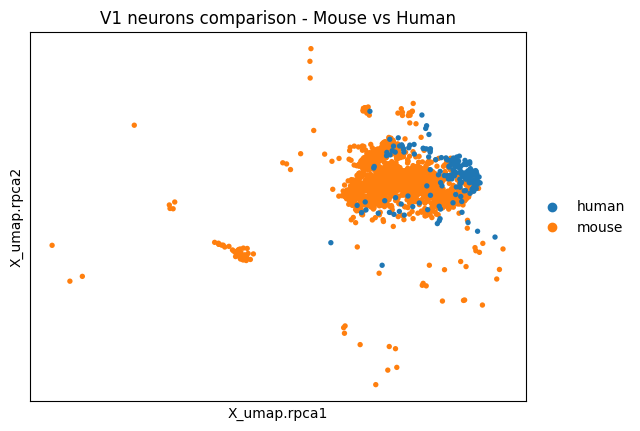

In [62]:
# Plot embeddings
sc.pl.embedding(comparison, basis = 'X_umap.rpca', color='species', save='comparison_species.png', title='V1 neurons comparison - Mouse vs Human')

In [54]:
# Chi2 test to evaluate if the distribution of V1 neurons in humans is likely

from scipy.stats import chi2_contingency
obs = np.array([[counts_xgb['V1'][3], counts_xgb['NeuronOnly'][3]], [counts_xgb['V1'][4], counts_xgb['NeuronOnly'][4]], [counts_xgb['V1'][5], counts_xgb['NeuronOnly'][5]], [counts_xgb['V1'][6], counts_xgb['NeuronOnly'][6]]])
obs

array([[1794,   26],
       [  53, 4253],
       [ 113, 2241],
       [  11, 1671]])

In [55]:
chi2, p, dof, ex = chi2_contingency(obs)

In [56]:
# Shox results
print('Chi2: %.2f' % chi2)
print('p-value: %.2f' % p)


Chi2: 8905.24
p-value: 0.00


In [57]:
# test de fisher 
from scipy.stats import fisher_exact

oddsratio, pvalue = fisher_exact(obs)

print('Odds ratio: %.2f' % oddsratio)
print('p-value: %.2f' % pvalue)

Odds ratio: 0.00
p-value: 0.00


In [58]:
# Equivalence test TOST
from statsmodels.stats.proportion import tost_proportions_2indep

count1, nobs1 = counts_xgb['V1'][3], counts_xgb['V1'][3] + counts_xgb['NeuronOnly'][3]
count2, nobs2 = counts_xgb['V1'][4], counts_xgb['V1'][4] + counts_xgb['NeuronOnly'][4]
eps = 0.1 * (counts_xgb['proportion'][3] + counts_xgb['proportion'][4]) / 2
print(count1, nobs1, count2, nobs2, eps)

test = tost_proportions_2indep(count1, nobs1, count2, nobs2, -eps, eps, compare = 'diff')
print(test)

1794 1820 53 4306 0.04990113462942075
statistic = 279.671544365363
pvalue = 1.0
compare = diff
method = None
results_larger = statistic = 309.92025852924104
    pvalue = 0.0
    compare = diff
    method = agresti-caffo
    diff = 0.9734058788401566
    ratio = 80.08463611859838
    odds_ratio = 5536.924528301907
    variance = 1.0885966569652297e-05
    alternative = larger
    value = -0.04990113462942075
    tuple = (np.float64(309.92025852924104), np.float64(0.0))
results_smaller = statistic = 279.671544365363
    pvalue = 1.0
    compare = diff
    method = agresti-caffo
    diff = 0.9734058788401566
    ratio = 80.08463611859838
    odds_ratio = 5536.924528301907
    variance = 1.0885966569652297e-05
    alternative = smaller
    value = 0.04990113462942075
    tuple = (np.float64(279.671544365363), np.float64(1.0))
title = Equivalence test for 2 independent proportions
tuple = (np.float64(279.671544365363), np.float64(1.0))


In [59]:
count1, nobs1 = counts_xgb['V1'][5], counts_xgb['V1'][5] + counts_xgb['NeuronOnly'][5]
count2, nobs2 = counts_xgb['V1'][6], counts_xgb['V1'][6] + counts_xgb['NeuronOnly'][6]
eps = 0.5 * (counts_xgb['proportion'][5] + counts_xgb['proportion'][6]) / 2
print(count1, nobs1, count2, nobs2, eps)

test = tost_proportions_2indep(count1, nobs1, count2, nobs2, -eps, eps, compare = 'diff')
print(test)

113 2354 11 1682 0.013635808000549575
statistic = 5.66915815048264
pvalue = 0.9999999928249569
compare = diff
method = None
results_larger = statistic = 11.265714765547576
    pvalue = 9.688658045200063e-30
    compare = diff
    method = agresti-caffo
    diff = 0.041463564939178084
    ratio = 7.3401560206997765
    odds_ratio = 7.659851527321408
    variance = 2.3745424799433416e-05
    alternative = larger
    value = -0.013635808000549575
    tuple = (np.float64(11.265714765547576), np.float64(9.688658045200063e-30))
results_smaller = statistic = 5.66915815048264
    pvalue = 0.9999999928249569
    compare = diff
    method = agresti-caffo
    diff = 0.041463564939178084
    ratio = 7.3401560206997765
    odds_ratio = 7.659851527321408
    variance = 2.3745424799433416e-05
    alternative = smaller
    value = 0.013635808000549575
    tuple = (np.float64(5.66915815048264), np.float64(0.9999999928249569))
title = Equivalence test for 2 independent proportions
tuple = (np.float64(5.